# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [2]:
sns.set_style('whitegrid')

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/exam week 1 SDAIA Zeham/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [6]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.shape

(12316, 32)

In [8]:
df.sample(2)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
10757,13:54:00,Saturday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Governmental,2-5yrs,...,NaN,Driver or rider,Female,18-30,3,NaN,NaN,Not a Pedestrian,No distancing,Serious Injury
5900,12:05:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Above 10yr,...,Overtaking,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [10]:
df['Time']=pd.to_datetime(df['Time'])

<ipython-input-10-ca8834d81e24>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  object        
 7   Type_of_vehicle              12316 non-null  object        
 8   Owner_of_vehicle             12316 non-null  object        
 9   Service_year_of_vehicle      12316 non-null  object        
 10  Defect_of_vehicle            12316 non-null  object        
 11  Area_accident_occured        12316 non-nu

In [19]:
df.isnull().sum().sum()

0

In [20]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [21]:
df.corr(numeric_only=True)

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


In [22]:
df.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [23]:
#Handling Missing Values:
df['Educational_level'].fillna(df['Educational_level'].mode()[0], axis = 0 , inplace =True)
df['Vehicle_driver_relation'].fillna(df.Vehicle_driver_relation.mode()[0], axis = 0 , inplace =True)
df['Driving_experience'].fillna(df.Driving_experience.mode()[0], axis = 0 , inplace =True)
df['Type_of_vehicle'].fillna(df.Vehicle_driver_relation.mode()[0], axis = 0 , inplace =True)
df['Owner_of_vehicle'].fillna(df.Owner_of_vehicle.mode()[0], axis = 0 , inplace =True)
df['Service_year_of_vehicle'].fillna(df.Service_year_of_vehicle.mode()[0], axis = 0 , inplace =True)
df['Defect_of_vehicle'].fillna(df.Defect_of_vehicle.mode()[0], axis = 0 , inplace =True)
df['Area_accident_occured'].fillna(df.Area_accident_occured.mode()[0], axis = 0 , inplace =True)
df['Lanes_or_Medians'].fillna(df.Lanes_or_Medians.mode()[0], axis = 0 , inplace =True)
df['Road_allignment'].fillna(df.Road_allignment.mode()[0], axis = 0 , inplace =True)
df['Types_of_Junction'].fillna(df.Types_of_Junction.mode()[0], axis = 0 , inplace =True)
df['Road_surface_type'].fillna(df.Road_surface_type.mode()[0], axis = 0 , inplace =True)
df['Type_of_collision'].fillna(df.Type_of_collision.mode()[0], axis = 0 , inplace =True)
df['Vehicle_movement'].fillna(df.Vehicle_movement.mode()[0], axis = 0 , inplace =True)
df['Work_of_casuality'].fillna(df.Work_of_casuality.mode()[0], axis = 0 , inplace =True)
df['Fitness_of_casuality'].fillna(df.Fitness_of_casuality.mode()[0], axis = 0 , inplace =True)


In [24]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [25]:
#Normalization/Scaling:
#numerical data
numerical_features = df.select_dtypes(include='number').columns.tolist()

In [26]:
numerical_features

['Number_of_vehicles_involved', 'Number_of_casualties']

In [27]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [28]:
cat_features = df.select_dtypes(exclude = 'number').columns.to_list()
cat_features

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

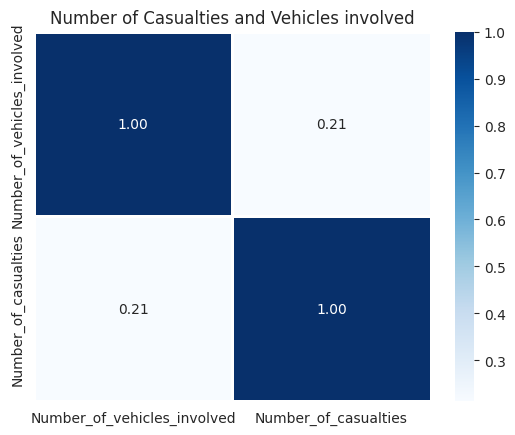

In [29]:
sns.heatmap(
    df.corr(numeric_only=True),
    fmt='.2f',
    annot = True,
    linewidth=1,
    cmap='Blues'
)
plt.title('Number of Casualties and Vehicles involved')
plt.show()

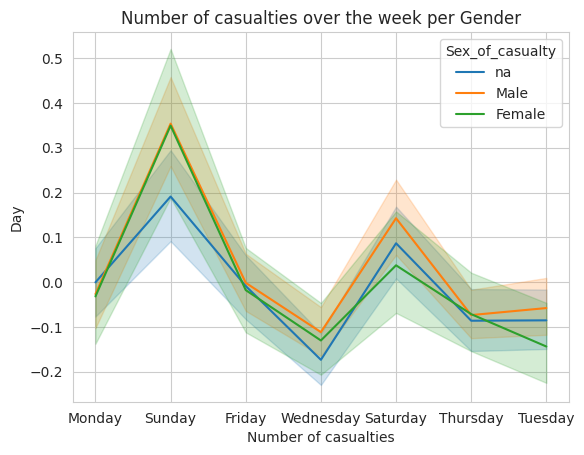

In [30]:

sns.lineplot(
    x = df['Day_of_week'],
    y = df['Number_of_casualties'],
    hue= df['Sex_of_casualty']
)
plt.title('Number of casualties over the week per Gender' , fontsize=12)
plt.xlabel('Number of casualties')
plt.ylabel('Day')
plt.show()

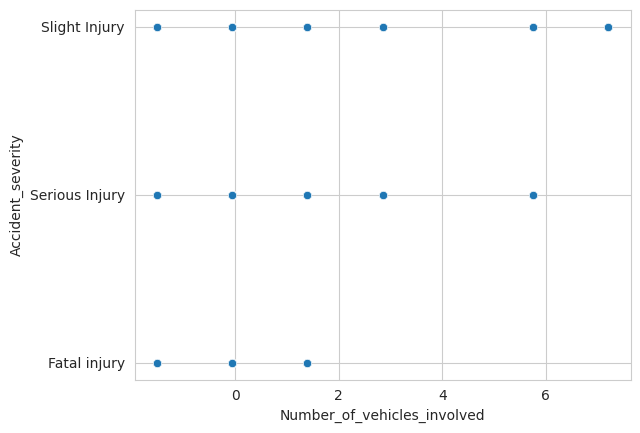

In [31]:
#seaborn.scatterplot( data['Age'], data['Weight'], hue =data["Position"])

sns.scatterplot(
    x = df['Number_of_vehicles_involved'],
    y = df['Accident_severity'],
    #hue =df['Sex_of_driver']
)
plt.show()

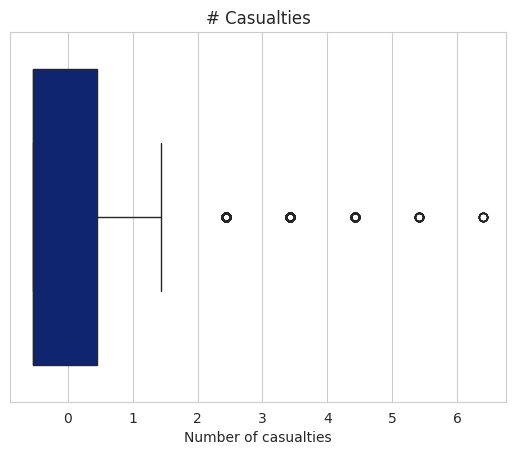

In [32]:
#plt.figure(figsize=(10,6))
sns.boxplot(
    df['Number_of_casualties'],
    orient ='h',
    palette ='dark'
)
plt.title('# Casualties')
plt.xlabel('Number of casualties')
plt.show()

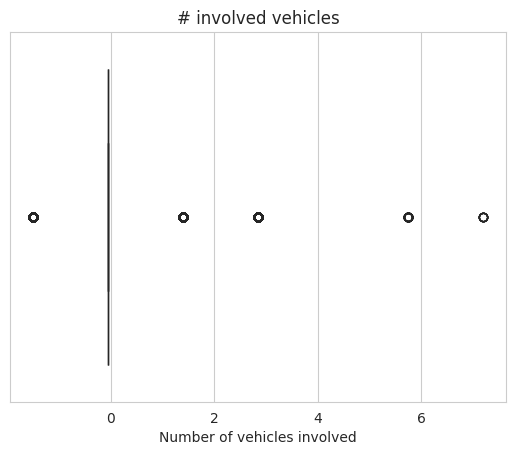

In [33]:
sns.boxplot(
    df['Number_of_vehicles_involved'],
    orient ='h',
    palette ='dark'
)
plt.title('# involved vehicles')
plt.xlabel('Number of vehicles involved')
plt.show()

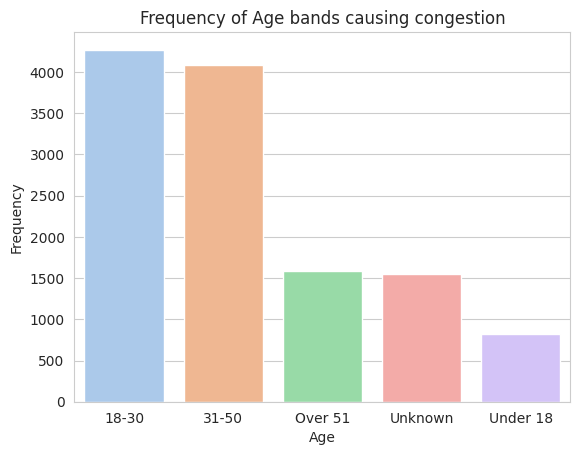

In [34]:
sns.barplot(
    x=df['Age_band_of_driver'].value_counts().index,
    y = df['Age_band_of_driver'].value_counts().values,
    palette='pastel'
)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Age bands causing congestion')
plt.show()

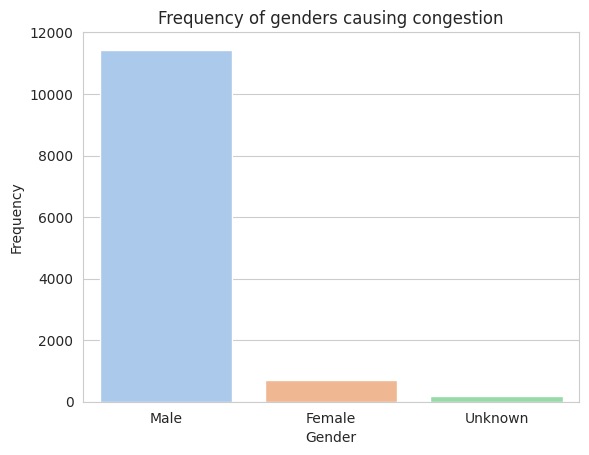

In [35]:
sns.barplot(
    x=df['Sex_of_driver'].value_counts().index,
    y = df['Sex_of_driver'].value_counts().values,
    palette='pastel'
)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of genders causing congestion')
plt.show()

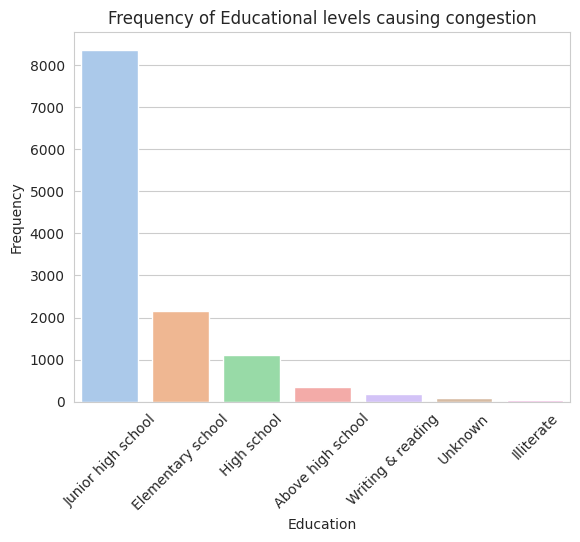

In [36]:
sns.barplot(
    x=df['Educational_level'].value_counts().index,
    y = df['Educational_level'].value_counts().values,
    palette='pastel'
)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Frequency of Educational levels causing congestion')
plt.xticks(rotation =45)
plt.show()

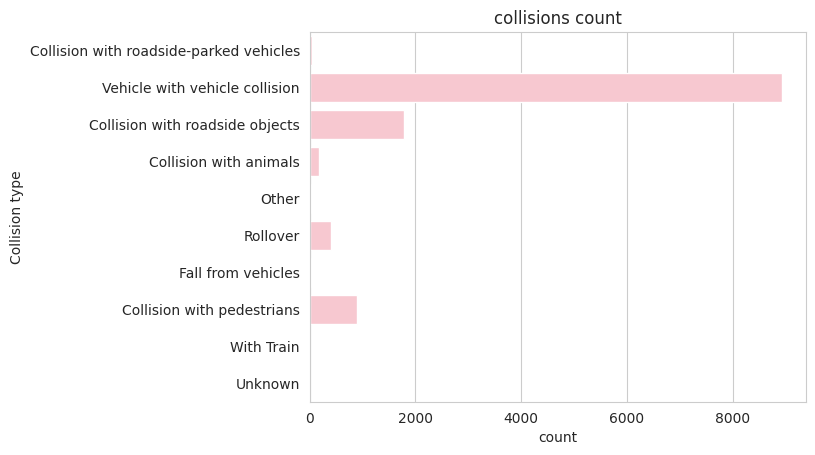

In [37]:
sns.countplot(
    df['Type_of_collision'],
    #orient='v'
    color ='pink'
)
plt.title('collisions count')
plt.xlabel('count')
plt.ylabel('Collision type')
plt.show()

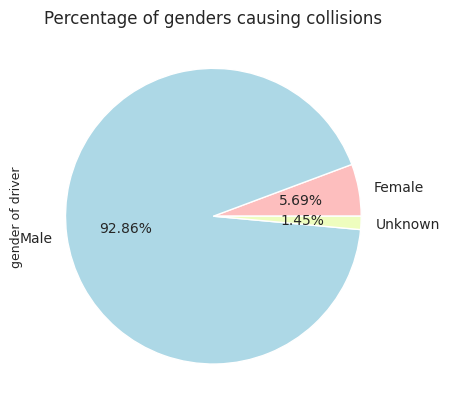

In [38]:
df.groupby(['Sex_of_driver'])['Sex_of_driver'].count().plot(
    kind = 'pie',
    autopct = '%1.2f%%' ,
    colors = ['#FDBEBE', 'lightblue','#EEFDBE']
)
plt.title('Percentage of genders causing collisions')
plt.ylabel('gender of driver',fontsize=9)
plt.show()

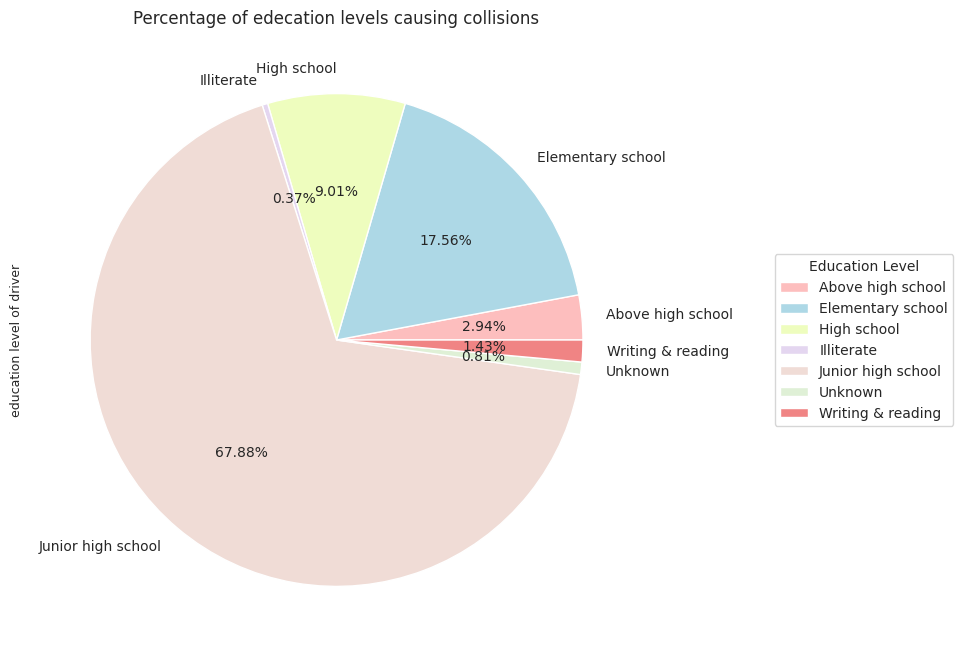

In [127]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

df.groupby(['Educational_level'])['Educational_level'].count().plot(
    kind = 'pie',
    autopct = '%0.2f%%' ,
    colors = ['#FDBEBE', 'lightblue','#EEFDBE','#E4D6F0','#F0DCD6','#DFF0D6','#F08484'],
    #labels=None
)
plt.title('Percentage of edecation levels causing collisions')
plt.ylabel('education level of driver',fontsize=9)
ax.legend(
          title="Education Level",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

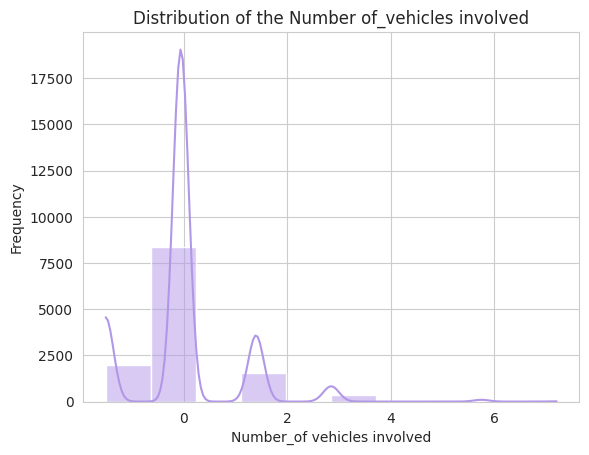

In [39]:
sns.histplot(
    data = df,
    x=df['Number_of_vehicles_involved'],
    color = '#B297E8',
    bins =10,
    kde=True
)
plt.title('Distribution of the Number of_vehicles involved', fontsize=12)
plt.xlabel('Number_of vehicles involved')
plt.ylabel('Frequency')
plt.show()


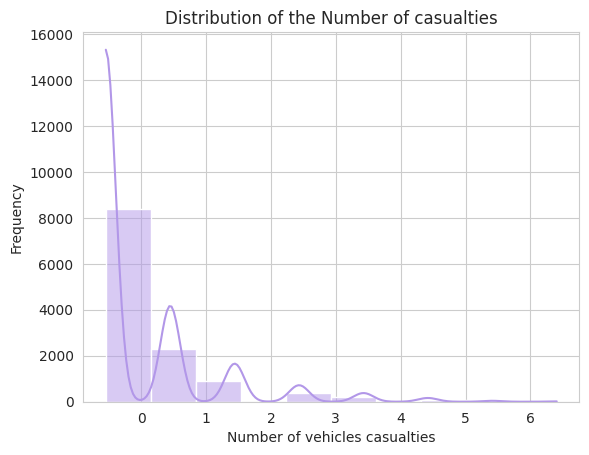

In [40]:
sns.histplot(
    data = df,
    x=df['Number_of_casualties'],
    color = '#B297E8',
    bins =10,
    kde=True
)
plt.title('Distribution of the Number of casualties', fontsize=12)
plt.xlabel('Number of vehicles casualties')
plt.ylabel('Frequency')
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  object        
 7   Type_of_vehicle              12316 non-null  object        
 8   Owner_of_vehicle             12316 non-null  object        
 9   Service_year_of_vehicle      12316 non-null  object        
 10  Defect_of_vehicle            12316 non-null  object        
 11  Area_accident_occured        12316 non-nu

In [42]:
df['vehicles_casualties_ratio']= df['Number_of_casualties']/df['Number_of_vehicles_involved']

In [43]:
df['Age_band_of_driver'].value_counts()

,count
Age_band_of_driver,
18-30,4271
31-50,4087
Over 51,1585
Unknown,1548
Under 18,825


In [44]:
def aging(age):
    if age == 'Unknown':
        return 0
    elif age == 'Under 18':
        return 17
    elif age == 'Over 51':
      return 52
    elif age == '31-50':
      return 50
    else:
        return 30

In [45]:
df['max_age'] = df['Age_band_of_driver'].apply(aging)

In [46]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'vehicles_casualties_ratio',
       'max_age'],
      dtype='object')

In [47]:
x = df[['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver','Educational_level',
     'Type_of_vehicle','Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Driving_experience',
       'Sex_of_casualty', 'Age_band_of_casualty','vehicles_casualties_ratio', 'max_age']]

y = df[['Accident_severity']]

In [121]:
#ordered

label_features = x[['Day_of_week','Age_band_of_driver','Educational_level', 'Driving_experience','Age_band_of_casualty']]
#no order
onehot_features = x[~x[x.select_dtypes(exclude='number').columns.to_list()].isin(label_features.columns.to_list()) & x[x.select_dtypes(exclude=['number','datetime64']).columns.to_list()]]

label_transformer = Pipeline(
    steps =[('encoder', OneHotEncoder(handle_unknown = 'ignore')),
            ('selector' , SelectPercentile(chi2 , percentile =25))
            ]
)


onehot_transformer = Pipeline(
    steps =[('encoder', OneHotEncoder(handle_unknown = 'ignore')),
            ('selector' , SelectPercentile(chi2 , percentile =25))
            ]
)



preprocessor = ColumnTransformer(
    transformers = [
        ('label' , label_transformer , label_features.columns),
        ('onehot' , onehot_transformer , onehot_features.columns)
    ]
)

clf = Pipeline(
    steps=[
        ('processor' , preprocessor),
        #('Logistic' , LogisticRegression()),
        #('DT', DecisionTreeClassifier()),
        #('SVM' ,  LinearSVC()),
        ('KKN' , KNeighborsClassifier())
           ]
)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(x , y , test_size=0.2 ,random_state=0)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [68]:
log_model = clf.fit(X_train , y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [110]:
DC_model = clf.fit(X_train , y_train)

#### Support Vector Machine (SVM)

In [116]:
SVM_Model=clf.fit(X_train , y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### K-Neighbors Classifier

In [122]:

KKN_model=clf.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [107]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score ,confusion_matrix, auc, ConfusionMatrixDisplay , f1_score , roc_curve , precision_score , recall_score

In [71]:
#LogisticRegression:
#Accuracy for training
y_pred_train_1 = log_model.predict(X_train)
print("Accuracy for train: %.2f" % accuracy_score(y_train, y_pred_train_1))


#Accuracy for testing
y_pred_test_1 = log_model.predict(X_test)
print("Accuracy for test: %.2f" % accuracy_score(y_test, y_pred_test_1))

Accuracy for train: 0.85
Accuracy for test: 0.84


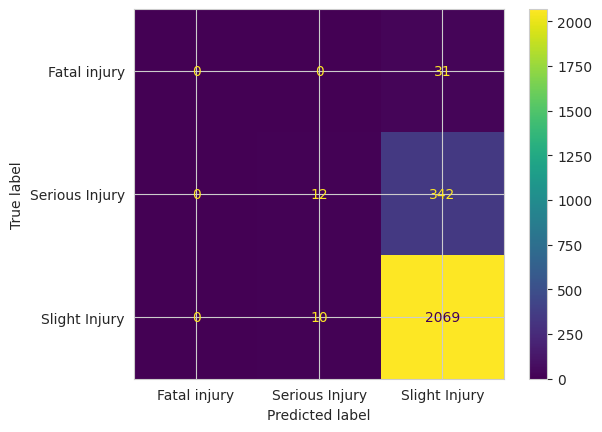

In [73]:
#confusion matrix :

cm = confusion_matrix(y_test, y_pred_test_1, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

In [93]:
#LogisticRegression:
#F1 Score for training
print("F1 Score for train: %.2f" % f1_score(y_train, y_pred_train_1,average='weighted'))


#F1 Score for testing
print("F1 Score  for test: %.2f" % f1_score(y_test, y_pred_test_1,average='weighted'))

F1 Score for train: 0.79
F1 Score  for test: 0.78


In [96]:
#Precision and Recall
print("Precision for train: %.2f" % precision_score(y_train, y_pred_train_1,average='weighted'))


#F1 Score for testing
print("Precision  for test: %.2f" % precision_score(y_test, y_pred_test_1,average='weighted'))

print()
print()

print("Recall for train: %.2f" % recall_score(y_train, y_pred_train_1,average='weighted'))


#F1 Score for testing
print("Recall  for test: %.2f" % recall_score(y_test, y_pred_test_1,average='weighted'))

Precision for train: 0.83
Precision  for test: 0.79




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall for train: 0.85
Recall  for test: 0.84


In [111]:
#DCT:
#Accuracy for training
y_pred_train_2 = DC_model.predict(X_train)
print("Accuracy for train: %.2f" % accuracy_score(y_train, y_pred_train_2))


#Accuracy for testing
y_pred_test_2 = DC_model.predict(X_test)
print("Accuracy for test: %.2f" % accuracy_score(y_test, y_pred_test_2))

Accuracy for train: 0.88
Accuracy for test: 0.83


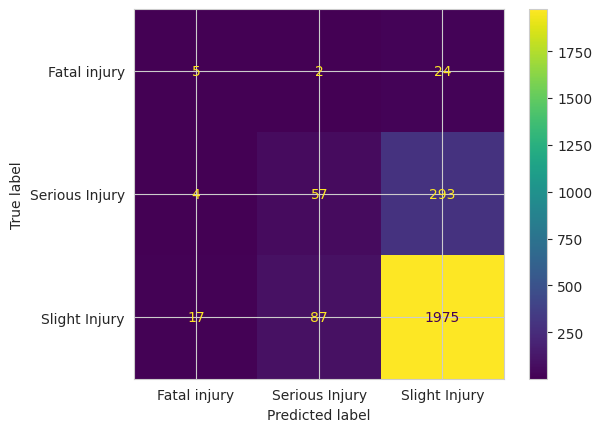

In [112]:
#confusion matrix :

cm2 = confusion_matrix(y_test, y_pred_test_2, labels=clf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=clf.classes_)
disp2.plot()

plt.show()

In [113]:

#F1 Score for training
print("F1 Score for train: %.2f" % f1_score(y_train, y_pred_train_2,average='weighted'))


#F1 Score for testing
print("F1 Score  for test: %.2f" % f1_score(y_test, y_pred_test_2,average='weighted'))

F1 Score for train: 0.86
F1 Score  for test: 0.80


In [114]:
#Precision and Recall
print("Precision for train: %.2f" % precision_score(y_train, y_pred_train_2,average='weighted'))


#F1 Score for testing
print("Precision  for test: %.2f" % precision_score(y_test, y_pred_test_2,average='weighted'))

print()
print()

print("Recall for train: %.2f" % recall_score(y_train, y_pred_train_2,average='weighted'))


#F1 Score for testing
print("Recall  for test: %.2f" % recall_score(y_test, y_pred_test_2,average='weighted'))

Precision for train: 0.87
Precision  for test: 0.79


Recall for train: 0.88
Recall  for test: 0.83


In [117]:
#SVM
#Accuracy for training
y_pred_train_3 = SVM_Model.predict(X_train)
print("Accuracy for train: %.2f" % accuracy_score(y_train, y_pred_train_3))


#Accuracy for testing
y_pred_test_3 = SVM_Model.predict(X_test)
print("Accuracy for test: %.2f" % accuracy_score(y_test, y_pred_test_3))

Accuracy for train: 0.85
Accuracy for test: 0.85


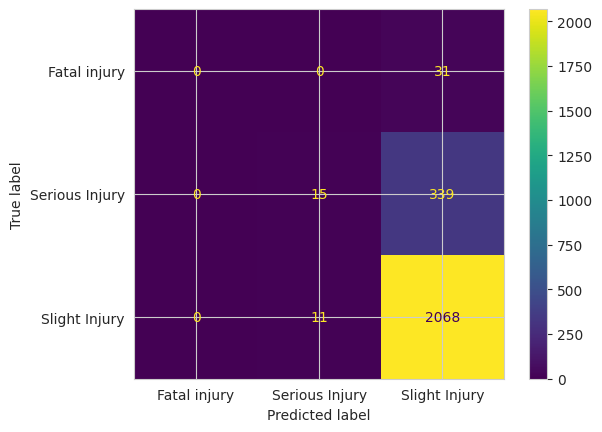

In [118]:
#confusion matrix :

cm3 = confusion_matrix(y_test, y_pred_test_3, labels=clf.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                               display_labels=clf.classes_)
disp3.plot()

plt.show()

In [119]:

#F1 Score for training
print("F1 Score for train: %.2f" % f1_score(y_train, y_pred_train_3,average='weighted'))


#F1 Score for testing
print("F1 Score  for test: %.2f" % f1_score(y_test, y_pred_test_3,average='weighted'))

F1 Score for train: 0.79
F1 Score  for test: 0.78


In [120]:
#Precision and Recall
print("Precision for train: %.2f" % precision_score(y_train, y_pred_train_3,average='weighted'))


#F1 Score for testing
print("Precision  for test: %.2f" % precision_score(y_test, y_pred_test_3,average='weighted'))

print()
print()

print("Recall for train: %.2f" % recall_score(y_train, y_pred_train_3,average='weighted'))


#F1 Score for testing
print("Recall  for test: %.2f" % recall_score(y_test, y_pred_test_3,average='weighted'))

Precision for train: 0.81
Precision  for test: 0.80


Recall for train: 0.85
Recall  for test: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
#KNN
#Accuracy for training
y_pred_train_4 = KKN_model.predict(X_train)
print("Accuracy for train: %.2f" % accuracy_score(y_train, y_pred_train_4))


#Accuracy for testing
y_pred_test_4 = KKN_model.predict(X_test)
print("Accuracy for test: %.2f" % accuracy_score(y_test, y_pred_test_4))

Accuracy for train: 0.84
Accuracy for test: 0.82


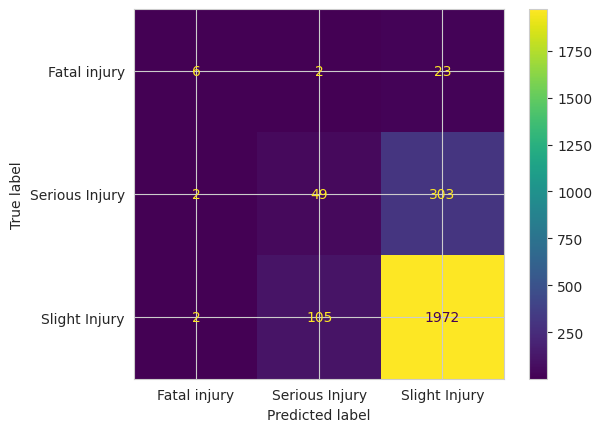

In [124]:
#confusion matrix :

cm4 = confusion_matrix(y_test, y_pred_test_4, labels=clf.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                               display_labels=clf.classes_)
disp4.plot()

plt.show()

In [125]:

#F1 Score for training
print("F1 Score for train: %.2f" % f1_score(y_train, y_pred_train_4,average='weighted'))


#F1 Score for testing
print("F1 Score  for test: %.2f" % f1_score(y_test, y_pred_test_4,average='weighted'))

F1 Score for train: 0.81
F1 Score  for test: 0.79


In [126]:
#Precision and Recall
print("Precision for train: %.2f" % precision_score(y_train, y_pred_train_4,average='weighted'))


#F1 Score for testing
print("Precision  for test: %.2f" % precision_score(y_test, y_pred_test_4,average='weighted'))

print()
print()

print("Recall for train: %.2f" % recall_score(y_train, y_pred_train_4,average='weighted'))


#F1 Score for testing
print("Recall  for test: %.2f" % recall_score(y_test, y_pred_test_4,average='weighted'))

Precision for train: 0.80
Precision  for test: 0.78


Recall for train: 0.84
Recall  for test: 0.82


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [ ]:
#percision, recall and F1 scores are better in Decision Tree classifier,which is justifiable
#as F1 score gathers between both decision and recall.
#confusion matrix also showed that decision tree is the most accurate classifier.
#Accuracy matrix also showed that decision tree is the most accurate classifier.

In [ ]:
# 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
      # 'Type_of_collision', 'Number_of_vehicles_involved',
      # 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Driving_experience'
      # were the most noticable features.

In [ ]:
#I believe that decision tree outperforms the rest of the classifiers, as the metrics showed.

In [ ]:
#Limitations happened to be in the categorical features, as they needed to be encoded.
#decision tree has the unknown depth parameter, which needs to be tuned


In [ ]:
#for future implementations , I suggest using algorithms for hyper-parameters tuning , such as grid search